<a href="https://colab.research.google.com/github/mgraudina/WoTech-2024-PHYTON/blob/main/08_10_Pokemon2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**L16: Project 1: Pokemon dataset analysis || (Pokémon data analysis using scatter plots, correlations, and correlation matrices. We start using the Seaborn library)**
1. Continuing work with first project: Pokemon data analysis
2. Understand how to analyze correlations in Pandas DataFrames
3. Creating scatter plots to evaluate the relationship between two variables
4. Understanding the difference between correlation and causation
5. Creating and visualizing correlation matrix with Seaborn library

In [ ]:
# CORRELATION - relationship btw two variables

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pokemon_df = pd.read_csv("/content/Pokemon.csv") # already reads in dataframe -->
# Pandas documentation "read_csv" to understand what the method does -->
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

In [ ]:
pokemon_df.head(n=5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


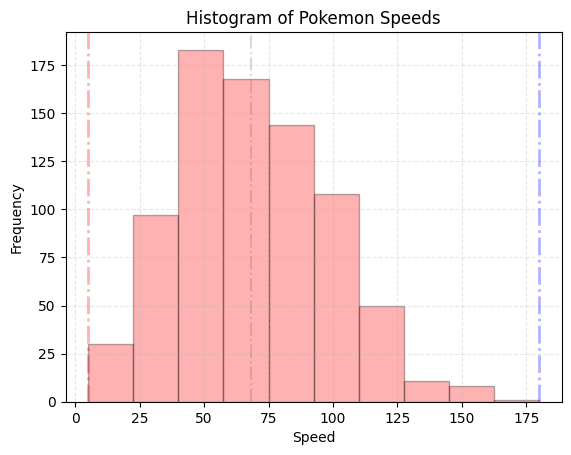

In [ ]:
### Create a HISTOGRAM of column "Speed"

plt.hist(pokemon_df["Speed"], color="red", edgecolor="black", alpha=0.3)
plt.xlabel("Speed")
plt.ylabel("Frequency")
plt.title('Histogram of Pokemon Speeds')
# plt.show()

### Add to your histogram min, max, mean (average) LINES

plt.axvline(pokemon_df["Speed"].mean(), linestyle="dashdot", color="gray", alpha=0.3)
plt.axvline(pokemon_df["Speed"].min(), color='red', linestyle='dashdot', linewidth=2, alpha=0.3)
plt.axvline(pokemon_df["Speed"].max(), color='blue', linestyle='dashdot', linewidth=2, alpha=0.3)

plt.grid(linestyle="--", alpha=0.3)


# CORRELATION

Text(0, 0.5, 'Defense')

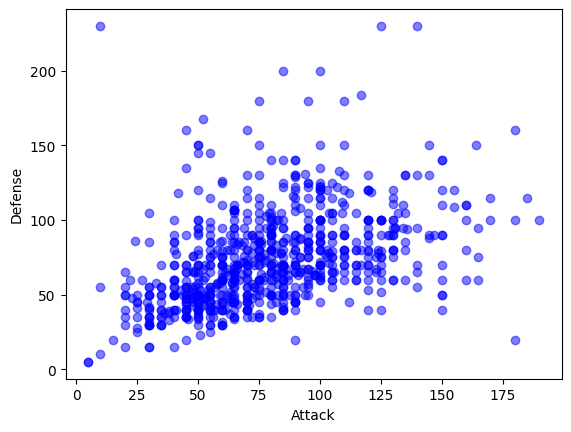

In [ ]:
# SCATTERPLOT btw variables "Attack" and "Defense"

# have to define x and y values

plt.scatter(pokemon_df["Attack"], pokemon_df["Defense"], color="blue", alpha=0.5)
plt.xlabel("Attack")
plt.ylabel("Defense")

# There could be positive correlation - as Attack increases, also Defense increases
# Different correlation types - trendline up = pos, down = neg, stable = no (see image below)
# Correlation does not mean there is correlation

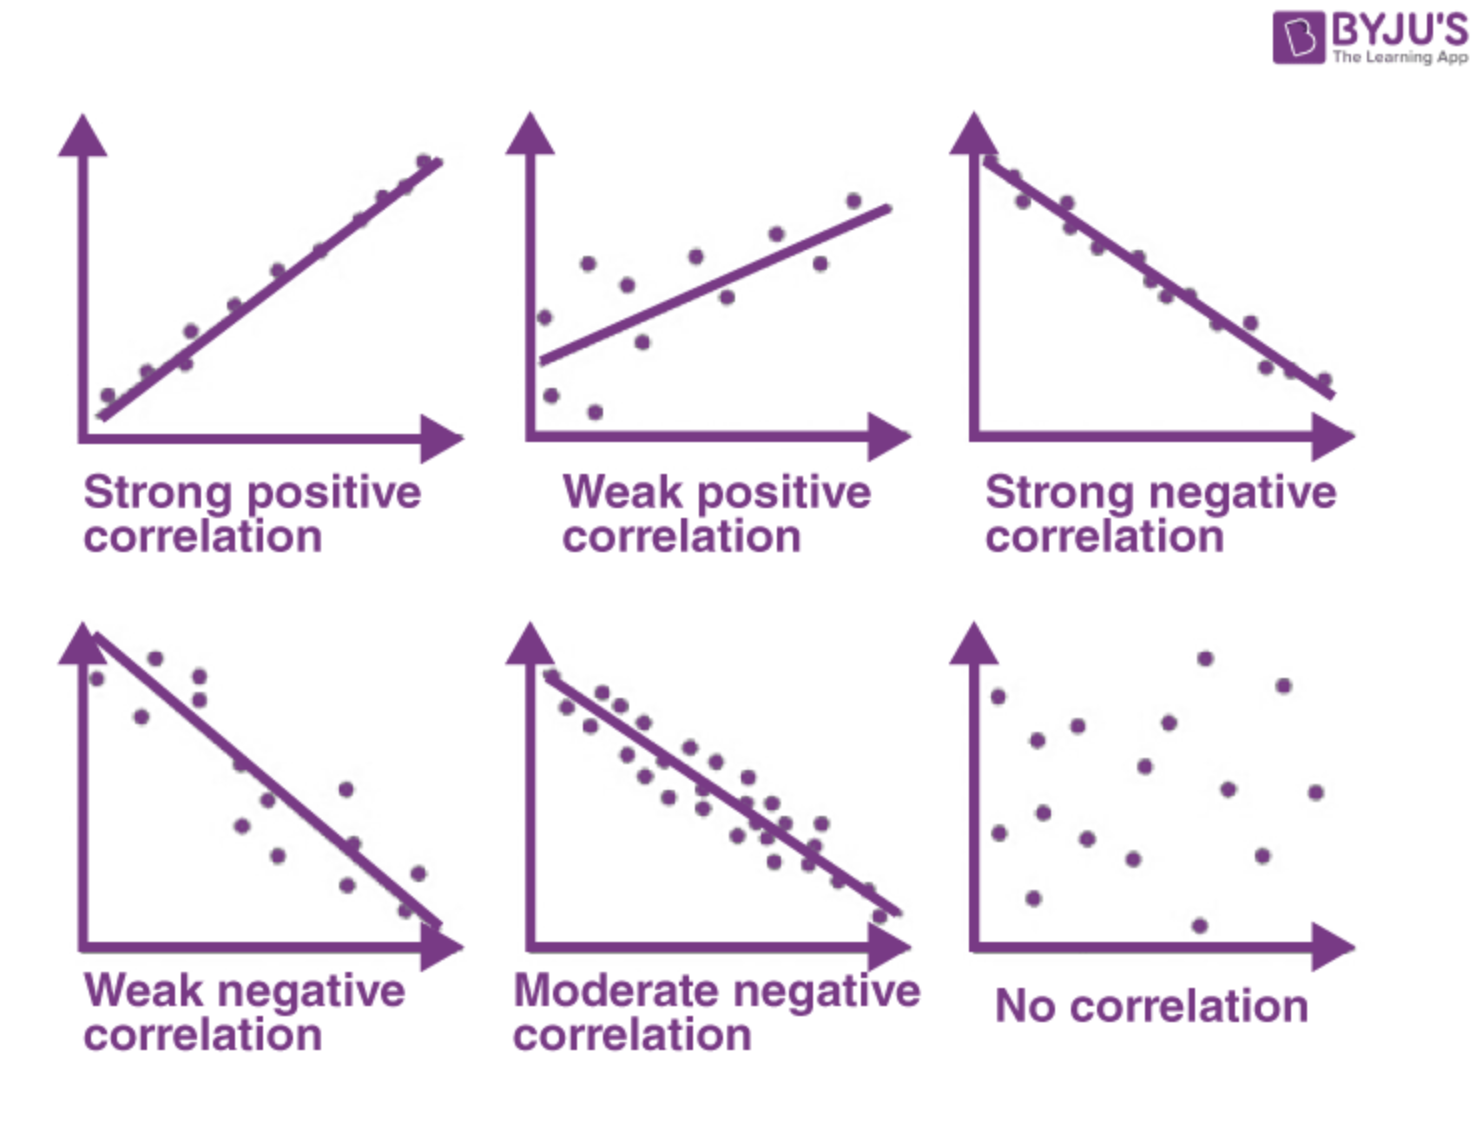

Text(0.5, 1.0, 'Speed vs. Defense')

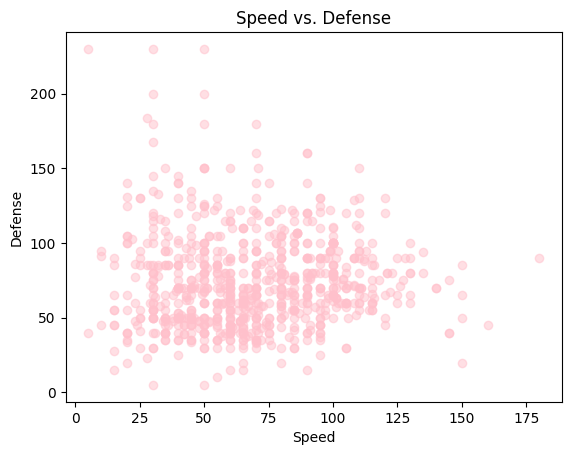

In [ ]:
# SCATTERPLOT for variables: Speed and Defense

plt.scatter(pokemon_df["Speed"], pokemon_df["Defense"], color="pink", alpha=0.5)
plt.xlabel("Speed")
plt.ylabel("Defense")
plt.title('Speed vs. Defense')


Text(0.5, 1.0, 'HP vs. Defense')

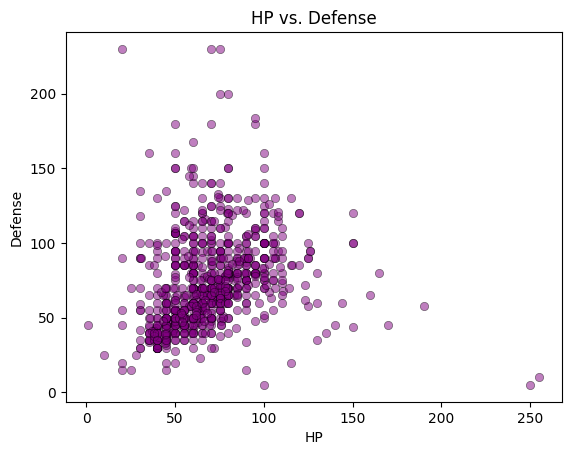

In [ ]:
# SCATTERPLOT for variables: HP and Defense (HP = Health Points)

plt.scatter(pokemon_df["HP"], pokemon_df["Defense"], color="purple", alpha=0.5, edgecolor="black", linewidths=0.5 )
plt.xlabel("HP")
plt.ylabel("Defense")
plt.title('HP vs. Defense')

# edgecolor="black", linewidths=0.5 to see better see dots

### PEARSON CORRELATION

The correlation coefficient indicates the strength and direction of the statistical relationship between two variables. The coefficient ranges from -1 to 1, with a value of 0.43 signifying a positive but moderately strong relationship between the two variables.

A positive correlation coefficient means that the variables increase together. Therefore, as one variable increases, the other also tends to increase, and vice versa.
The closer the correlation coefficient is to 1, the stronger the positive relationship.
A correlation coefficient of 0.43 is not very high, but it indicates a moderately positive relationship.
If the correlation coefficient were negative, it would suggest that as one variable increases, the other variable decreases.
A correlation coefficient of -1 indicates a perfect negative relationship.
Thus, a correlation coefficient of 0.43 might suggest that, for example, as Pokémon's Attack values increase, their Defense values tend to increase as well, but the relationship is not very strong.

Weak Correlation: 0 to ±0.3
Moderate Correlation: ±0.3 to ±0.7
Strong Correlation: ±0.7 to ±1

In [ ]:
# Result on this correlation calculation is -1 and 1. Meaning how variables interact with each other.
# -1 perfect negative relationship
# 1 perfect positive relationship

In [ ]:
# PEARSON CORRELATION between Attack/Defense

correlation1 = pokemon_df["Attack"].corr(pokemon_df["Defense"])
correlation1

0.4386870551184892

In [ ]:
# PEARSON CORRELATION between Speed/Defense

correlation2 = pokemon_df["Speed"].corr(pokemon_df["Defense"])
correlation2

0.015226598088597448

In [ ]:
# for loop that itereates through each column in df and calculates pearson correlation btw 1 variable against others.
# target variable Attack

# HINT: Select only numeric values!!!

numeric_columns = pokemon_df.select_dtypes(include=['number']) # d = datatypes, only numberic values
numeric_columns = numeric_columns.drop('#', axis=1) # axis 1 = column
numeric_columns


,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1
...,...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50,6
796,700,50,160,110,160,110,110,6
797,600,80,110,60,150,130,70,6
798,680,80,160,60,170,130,80,6


In [ ]:
target_column = "Attack"
correlation_results = {} # key=column, val=pearson_correlation into DICTIONARY

# for loop to compare target column and all other columns in the dataframe
# filter out Attack vs Attack column

for col in numeric_columns.columns: # for each value in dataframe columns
  if col == "Attack": # remove Attack column
    continue
  correlation = pokemon_df[target_column].corr(pokemon_df[col]) # target column with each column we iterate through
  correlation_results[col] = correlation # saving to dictionary where key is col, and value correaltion

correlation_results


{'Total': 0.7362106519949293,
 'HP': 0.422386028776223,
 'Defense': 0.4386870551184892,
 'Sp. Atk': 0.396361755349232,
 'Sp. Def': 0.26398955110108846,
 'Speed': 0.38123973924108967,
 'Generation': 0.051451336708469686}

### CORRELATION MATRIX

Matrix as long and wide as number of columns in your dataframe. Calculates correlations simultanously

In [ ]:
correlation_matrix = numeric_columns.corr() # all columns are numeric

correlation_matrix

# We could create the same dataframe by using double for loops

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
Total,1.000000,0.618748,0.736211,0.612787,0.747250,0.717609,0.575943,0.048384
HP,0.618748,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952,0.058683
Attack,0.736211,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240,0.051451
Defense,0.612787,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227,0.042419
Sp. Atk,0.747250,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018,0.036437
Sp. Def,0.717609,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133,0.028486
Speed,0.575943,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000,-0.023121
Generation,0.048384,0.058683,0.051451,0.042419,0.036437,0.028486,-0.023121,1.000000


# Visualizing with seaborn (library)

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Correlation matrix')

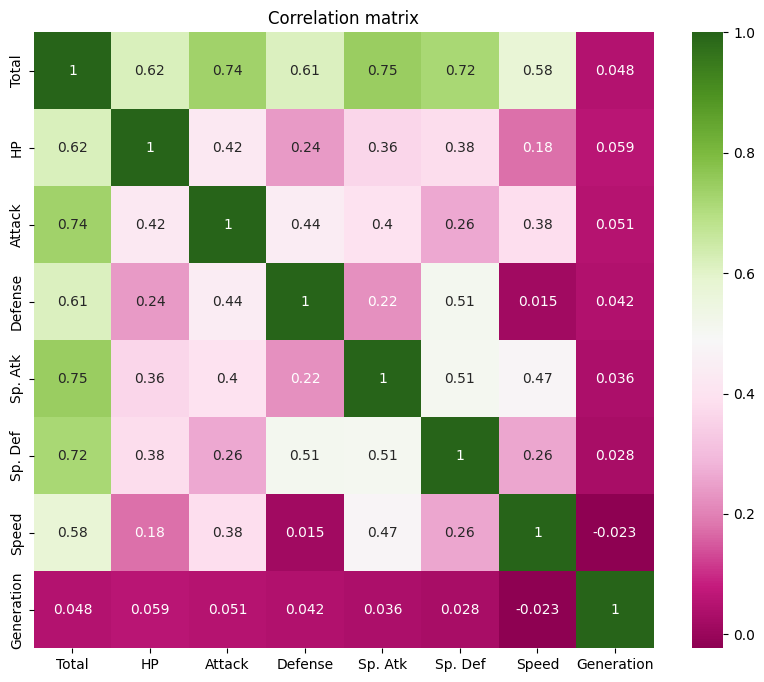

In [ ]:
# seaborn heatmap
# call library.vizualisation type

plt.figure(figsize=(10, 8)) # increases vizualisation size
sns.heatmap(correlation_matrix, annot=True, cmap="PiYG") # annotation --> adding values
plt.title("Correlation matrix")

# to see correlations and explain/vizualise to others
# there are different seaborn color palettes available --> e.g cmap="inferno"
# colormap values are as scale (values) are
# seaborn can function independently from matplotlib, but usually used together

# Spurious Correlation

Correlation is not causion, i.e variables do not affect each other, even they increase together.

https://www.tylervigen.com/spurious-correlations

Other: Freakonomics! https://freakonomics.com/

### Linear regression

You predict one value based on the other.
One of the simplest machine learning data models we can build.
Assumes there is linear correlation.


<Axes: xlabel='Attack', ylabel='Defense'>

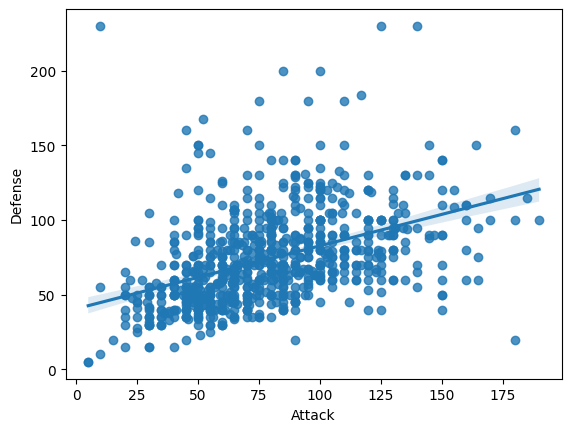

In [ ]:
# REGRESSION LINE to predict value

sns.regplot(x="Attack", y="Defense", data=pokemon_df) # scatter plot, adding regression line

# see documentation for sns.regplot
# plot a data, linear reg model fit to this model, fitting model to the data
# non linear, e.g curved - logistic line

Text(0.5, 1.0, 'Speed vs Defense')

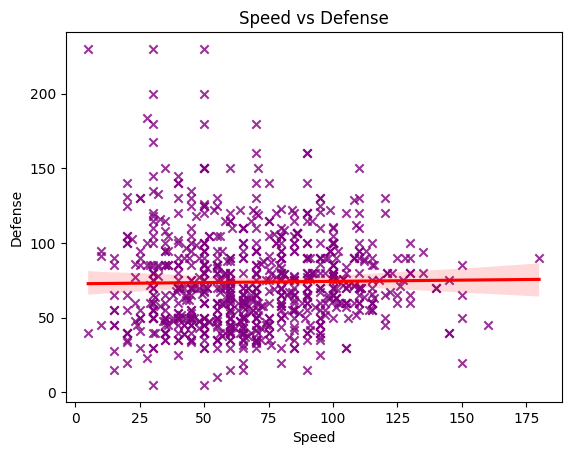

In [ ]:
sns.regplot(
    x='Speed', y='Defense',
    data=pokemon_df, color='purple',
    ci=99, marker='x', line_kws={'color':'red'}
    )

plt.title('Speed vs Defense')

Pearson correlation coefficient: 0.015226598088597448


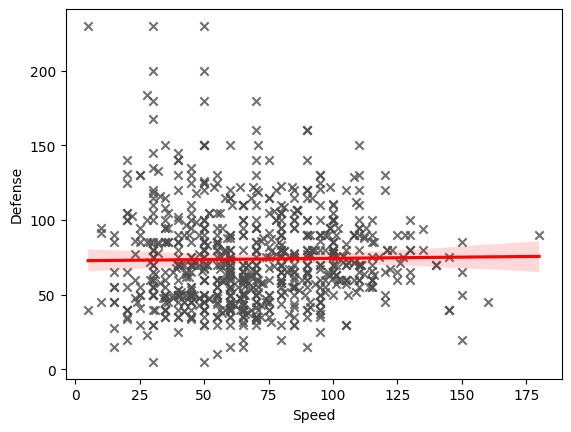

In [ ]:
sns.regplot(
    data=pokemon_df, x='Speed', y="Defense",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)

correlation4 = pokemon_df['Speed'].corr(pokemon_df['Defense'])
print('Pearson correlation coefficient:', correlation4)

# there is no correlation btw those 2 variables
# https://seaborn.pydata.org/generated/seaborn.regplot.html
# shadow around the line - error range

In [ ]:
# LINEAR REGRESSION VIDEO:
# https://www.youtube.com/watch?v=7ArmBVF2dCs&pp=ygUjd2hhdCBpcyBsaW5lYXIgcmVncmVzc2lvbiBzdGF0cXVlc3Q%3D

### TEAMWORK
Task: Visualizing the correlation of Attack and Defense variables of two Types: Grass and Water Type 1 Pokémon.

Pearson correlation coefficient: 0.5407436570609248


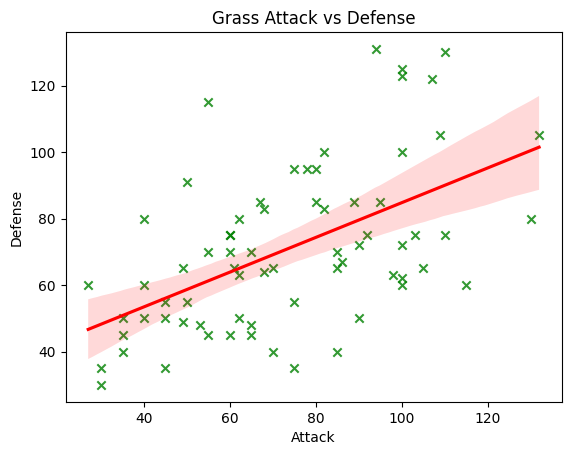

In [ ]:
# 1. Create two DataFrame Grass and Water

grass_df = pokemon_df[pokemon_df['Type 1'] == 'Grass']
water_df = pokemon_df[pokemon_df['Type 1'] == 'Water']

# 2. Create the regression plots for each (Grass and Water) &
# 3. Calculate the Pearson correlation for each DataFrame (variables: Attack and Defense)

sns.regplot(x='Attack', y='Defense', data=grass_df, color='green', marker='x', line_kws={'color':'red'})
plt.title('Grass Attack vs Defense')
print(f'Pearson correlation coefficient: {grass_df["Attack"].corr(grass_df["Defense"])}')

Pearson correlation coefficient: 0.5161628601933552


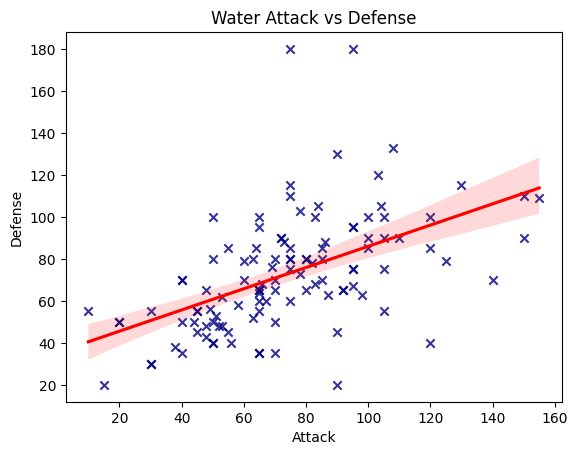

In [ ]:
sns.regplot(x='Attack', y='Defense', data=water_df, color='navy', marker='x', line_kws={'color':'red'})
plt.title('Water Attack vs Defense')
print(f'Pearson correlation coefficient: {water_df["Attack"].corr(water_df["Defense"])}')


In [ ]:
# 4. Explain to each other what do you see and what it means.

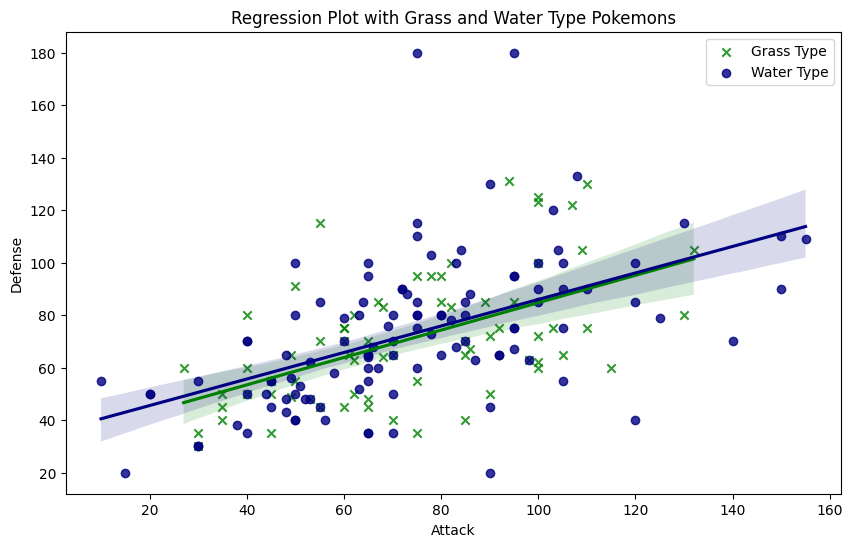

In [ ]:
# Grass and Water on the same plot
plt.figure(figsize=(10, 6))

sns.regplot(x='Attack', y='Defense', data=grass_df, marker='x', color='green', label='Grass Type')
sns.regplot(x='Attack', y='Defense', data=water_df, marker='o', color='navy', label='Water Type')

plt.xlabel('Attack')
plt.ylabel('Defense')
plt.title('Regression Plot with Grass and Water Type Pokemons')
plt.legend()